# 1) Contents of the approach
    1.a) Loading data and preview
    1.b) Initial understanding of the dataset(Volumne, size)
    1.c) Fix missing values in Age feature

In [1]:
# Import some required packages/libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style(style = "darkgrid")
plt.rcParams['figure.figsize'] = [9.0, 6.0] # make plot sizes, relatively larger than the normal notebook


In [2]:
# Load the data and preview
titanic_df = pd.read_csv("titanic-data.csv", index_col = ["PassengerId"])
titanic_df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
#Data summary on entries
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Data Quality Summary:
    1) Total of 891 passengers on Titanic
    2) Missing values for Age, Cabin, Embarked(for 2 passengers, we dont have the origin details, a bit tricky)
    3) Age needs to be fixed (mandatorily) for any analysis to be done next, missing rows of Cabin and Embarked can still be 
        ignored

In [4]:
#Distribution analysis of numeric columns
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Insights:
    1) As per data, there were infants as young as 4 months, and elderly people as old as 80 years
    2) More than 50% of the passengers were travelling in 3rd(low) class --> does that lead to higher/lower survival rate??
    3) More than 75% of the passengers were aged less than equal to 38, which also correlated(partially) the above point '2'

In [5]:
#Fix Age
mean_ages = titanic_df.groupby(['Sex','Pclass'])['Age'].mean()
display(mean_ages)

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [6]:
#Custom function
def replace_nan_age(row):
    if pd.isnull(row['Age']):
        return mean_ages[row['Sex'], row['Pclass']]
    else:
        return row['Age']

In [7]:
titanic_df['Age'] = titanic_df.apply(replace_nan_age, axis = 1)

In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.318643,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.281103,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.750000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,26.507589,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Number of parent/children aboard')

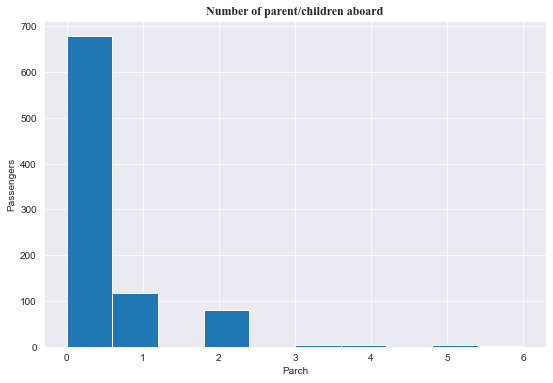

In [10]:
titanic_df.Parch.hist()
plt.xlabel('Parch')
plt.ylabel('Passengers')
plt.title('Number of parent/children aboard', fontweight = "bold", fontname = "Times New Roman")

Text(0.5, 1.0, 'Number of Siblings/Spouses aboard')

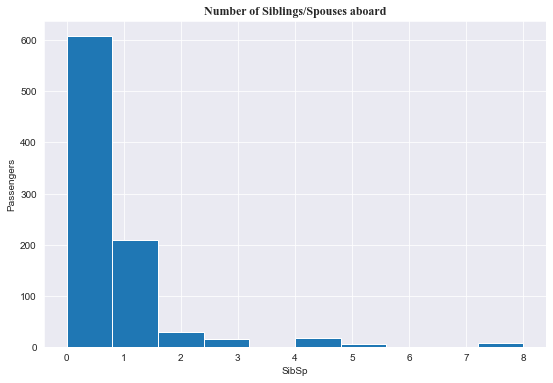

In [11]:
titanic_df.SibSp.hist()
plt.xlabel('SibSp')
plt.ylabel('Passengers')
plt.title('Number of Siblings/Spouses aboard',fontweight = "bold", fontname = "Times New Roman")

# We interpret below Insights:
    1) Oldest passenger onboard was 80 years old and youngest roughly 5 months old
    2) Avearge age of passengers onboard is less than 30 years, that means mostly young paasengers
    3) The Mean survival rate on Titanic was/is 38%
    4) Maximum fare charged was $512
    5) Maximum number of passengers were travelling were either without spuse or children
    6) We have cabin details for only 214 passengers out of 891 recorded passengers in the current dataset

# The above insights raises few question:
    1) Did the cabin/passenger class(Pclass) in which passengers were travelling make any difference in the survival rate??
    2) Impact of gender on survival rate??
    3) Passengers travelling with others(children && spouse && sibling) higher survival rate
    4) Age group impact on survival rate
    5) (Male vs. Female) vs. Pclass on survival rate

# Question1
#Hypothesis: passengers in higher class have higher survival rate

In [12]:
#Subset the data for required columns
survived_pclass_df = titanic_df[['Survived','Pclass']]
survived_pclass_df.head(6)

# Calculate survival rate by class
survived_by_pclass = survived_pclass_df.groupby(['Pclass']).sum()
total_by_pclass = survived_pclass_df.groupby(['Pclass']).count()

total_by_pclass.rename(columns = {'Survived': 'Total'}, inplace = True)

#merge the 2 dataframes
survived_total_by_pclass = pd.merge(survived_by_pclass, total_by_pclass, left_index = True, right_index = True)
# Incase there are no index columns, the use:  newdf = pd.merge(df1, df2, how = 'left', on = 'column')
survived_total_by_pclass

,Survived,Total
Pclass,,
1,136,216
2,87,184
3,119,491


In [13]:
#Calculate survival rate by each class
percent_survived = (survived_total_by_pclass['Survived']/survived_total_by_pclass['Total']) * 100
survived_total_by_pclass['Percentage'] = percent_survived

survived_total_by_pclass

,Survived,Total,Percentage
Pclass,,,
1,136,216,62.962963
2,87,184,47.282609
3,119,491,24.236253


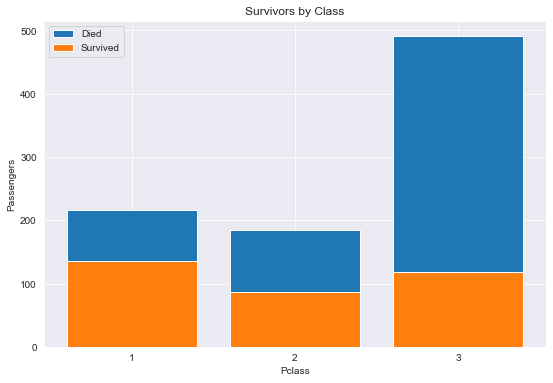

In [14]:
# Plotting the above story

x = survived_total_by_pclass.index.values
ht = survived_total_by_pclass.Total
hs = survived_total_by_pclass.Survived

pht = plt.bar(x, ht)
phs = plt.bar(x, hs)

plt.xticks(x,x)
plt.xlabel('Pclass')
plt.ylabel('Passengers')
plt.title('Survivors by Class')

plt.legend([pht,phs],['Died', 'Survived'])

# Conclusion on Q1:
    From the above representations, it is evident that 1st Class passengers, had the highest survival rate which 
    gradually decreases towards the lower class. The least survival rate in the 3rd class is 24%
    The survival rate of a passenger in 3rd class was/is even lower than the average survival rate on the boat (~38%)

# Question2:
Hypothesis: Female passengers had a higher survival rate

In [15]:
# Calculate Total by Gender

group_by_gender  = titanic_df.groupby('Sex')

#calculate survived by gender
survived_by_gender = group_by_gender['Survived'].sum()
survived_by_gender.name = 'Survived'
display(survived_by_gender)

#calculate totalby gender
total_by_gender = group_by_gender['Survived'].size()
total_by_gender.name = 'Total'
display(total_by_gender)

#Concat
survived_total_by_gender = pd.concat([survived_by_gender, total_by_gender], axis = 1)
survived_total_by_gender

Sex
female    233
male      109
Name: Survived, dtype: int64

Sex
female    314
male      577
Name: Total, dtype: int64

,Survived,Total
Sex,,
female,233,314
male,109,577


In [16]:
#Percentage
percent_survived = survived_total_by_gender['Survived'] / survived_total_by_gender['Total'] * 100
survived_total_by_gender['Percent'] = percent_survived


survived_total_by_gender

,Survived,Total,Percent
Sex,,,
female,233,314,74.203822
male,109,577,18.890815


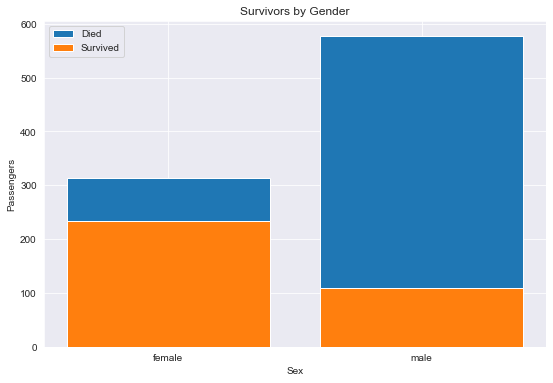

In [17]:
# Plotting the above story

#x = survived_total_by_pclass.index.values
x = range(len(survived_total_by_gender.index.values))
ht = survived_total_by_gender.Total
hs = survived_total_by_gender.Survived

pht = plt.bar(x, ht)
phs = plt.bar(x, hs)

plt.xticks(x,survived_total_by_gender.index.values)
plt.xlabel('Sex')
plt.ylabel('Passengers')
plt.title('Survivors by Gender')

plt.legend([pht,phs],['Died', 'Survived'])

# Conclusion on Q2:
    From the analysis above, we can interpret that female passenger had a comparatively higher survival rate which is 74%. 
    Whereas the survival rate of male passengers was/is lower than average ans tsnads at 18%. So female survival rate is roughly 
    4 times than of male passengers

# Question 3 : Did passengers accompanied by someone survided more??
Hypothesis: Passengers travelling with other had a higher survival rate

In [20]:
is_not_alone = (titanic_df.SibSp + titanic_df.Parch) >=1
passengers_not_alone = titanic_df[is_not_alone]

is_alone = (titanic_df.SibSp + titanic_df.Parch) == 0
passengers_alone = titanic_df[is_alone]

print('Not alone - describe')
display(passengers_not_alone.describe())
print('Alone - describe')
display(passengers_alone.describe())

Not alone - describe


,Survived,Pclass,Age,SibSp,Parch,Fare
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,0.505650,2.169492,26.316614,1.316384,0.960452,48.832275
std,0.500676,0.864520,14.901225,1.420774,1.039512,55.307615
min,0.000000,1.000000,0.420000,0.000000,0.000000,6.495800
25%,0.000000,1.000000,17.000000,1.000000,0.000000,18.000000
50%,1.000000,2.000000,26.000000,1.000000,1.000000,27.750000
75%,1.000000,3.000000,36.000000,1.000000,2.000000,59.044800
max,1.000000,3.000000,70.000000,8.000000,6.000000,512.329200


Alone - describe


,Survived,Pclass,Age,SibSp,Parch,Fare
count,537.000000,537.000000,537.000000,537.0,537.0,537.000000
mean,0.303538,2.400372,31.297634,0.0,0.0,21.242689
std,0.460214,0.804511,11.694910,0.0,0.0,42.223510
min,0.000000,1.000000,5.000000,0.0,0.0,0.000000
25%,0.000000,2.000000,23.000000,0.0,0.0,7.775000
50%,0.000000,3.000000,27.000000,0.0,0.0,8.137500
75%,1.000000,3.000000,36.000000,0.0,0.0,15.000000
max,1.000000,3.000000,80.000000,0.0,0.0,512.329200


Text(0.5, 1.0, "Alone & Not alone passenger's Ages")

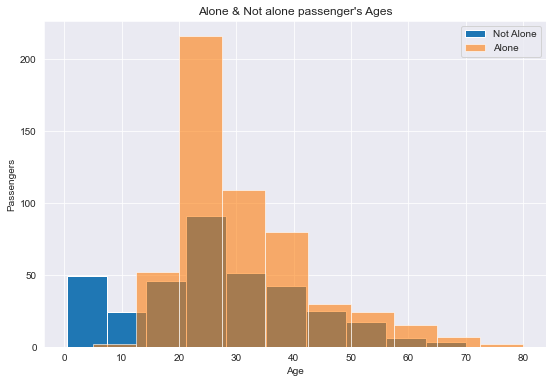

In [23]:
passengers_not_alone.Age.hist(label = 'Not Alone')
passengers_alone.Age.hist(label = 'Alone', alpha = 0.6)

plt.xlabel('Age')
plt.ylabel('Passengers')
plt.legend(loc = 'best')
plt.title('Alone & Not alone passenger\'s Ages')

# From the above visualization:

1) Those in the age group of 0 to 10, that is kids, were not alone - which makes sense
2) There however is probably 1 kid aged 5 to 10 who was alone as per dataset
3) There is an 80 year old person also was travelling alone
4) Except for age group 0 to 10, for all other age groups, passengers those who were travelling alone outnumbered those travelling in compamy

In [24]:
# Lets try their survival rate by proportion

notalone = np.where((titanic_df.SibSp + titanic_df.Parch) >=1 , 'Not Alone', 'Alone')
lone_summary = titanic_df.groupby(notalone, as_index=False)['Survived'].agg([np.sum,np.size])
lone_summary = lone_summary.rename(columns = {'sum':'survived', 'size':'Total'})

lone_summary

,survived,Total
Alone,163,537
Not Alone,179,354


In [38]:
notalone

array(['Not Alone', 'Not Alone', 'Alone', 'Not Alone', 'Alone', 'Alone',
       'Alone', 'Not Alone', 'Not Alone', 'Not Alone', 'Not Alone',
       'Alone', 'Alone', 'Not Alone', 'Alone', 'Alone', 'Not Alone',
       'Alone', 'Not Alone', 'Alone', 'Alone', 'Alone', 'Alone', 'Alone',
       'Not Alone', 'Not Alone', 'Alone', 'Not Alone', 'Alone', 'Alone',
       'Alone', 'Not Alone', 'Alone', 'Alone', 'Not Alone', 'Not Alone',
       'Alone', 'Alone', 'Not Alone', 'Not Alone', 'Not Alone',
       'Not Alone', 'Alone', 'Not Alone', 'Alone', 'Alone', 'Not Alone',
       'Alone', 'Not Alone', 'Not Alone', 'Not Alone', 'Alone',
       'Not Alone', 'Not Alone', 'Not Alone', 'Alone', 'Alone', 'Alone',
       'Not Alone', 'Not Alone', 'Alone', 'Alone', 'Not Alone',
       'Not Alone', 'Alone', 'Not Alone', 'Alone', 'Alone', 'Not Alone',
       'Not Alone', 'Alone', 'Not Alone', 'Alone', 'Not Alone', 'Alone',
       'Alone', 'Alone', 'Alone', 'Not Alone', 'Alone', 'Alone', 'Alone',
       'Alon

In [25]:
lone_summary['Percent survived'] = (lone_summary.survived / lone_summary.Total) *100

lone_summary


,survived,Total,Percent survived
Alone,163,537,30.353818
Not Alone,179,354,50.564972


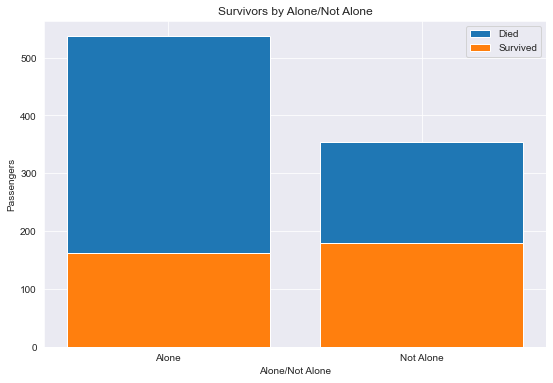

In [27]:
# Plotting the above story

#x = survived_total_by_pclass.index.values
x = range(len(lone_summary.index.values))
ht = lone_summary.Total
hs = lone_summary.survived

pht = plt.bar(x, ht)
phs = plt.bar(x, hs)

plt.xticks(x,lone_summary.index.values)
plt.xlabel('Alone/Not Alone')
plt.ylabel('Passengers')
plt.title('Survivors by Alone/Not Alone')

plt.legend([pht,phs],['Died', 'Survived'])

Conclusion on Q3: Passengers having company had higher survival rate

# Question4: Which age group had a better chance of survival

First review gender age distribution

In [28]:
male_age = (titanic_df[titanic_df.Sex == 'male'])['Age']
male_age.describe()

count    577.000000
mean      30.423672
std       13.264336
min        0.420000
25%       23.000000
50%       27.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [29]:
female_age = (titanic_df[titanic_df.Sex == 'female'])['Age']
female_age.describe()

count    314.000000
mean      27.288063
std       13.091327
min        0.750000
25%       21.000000
50%       24.000000
75%       35.000000
max       63.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Male & Female Ages')

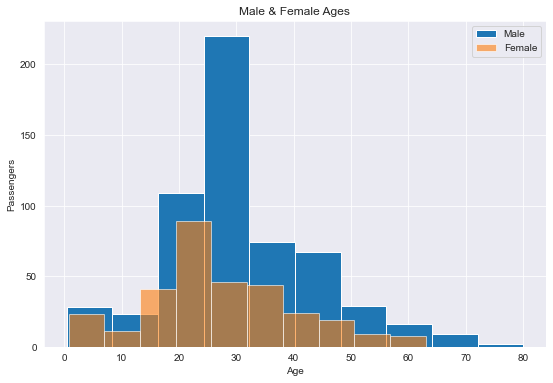

In [31]:
male_age.hist(label = 'Male')
female_age.hist(label = 'Female', alpha = 0.6)

plt.xlabel('Age')
plt.ylabel('Passengers')
plt.legend(loc = 'best')
plt.title('Male & Female Ages')

From the above distribution:
    1) For each age group, the number of females were lesser than number of male passengers
    2) The age of oldest female is 63, vs. oldest male passenger is 80

Let's do survival analysis by Age group

In [35]:
def age_group(age):
    if age>=80:
        return '80-89'
    if age>=70:
        return '70-79'
    if age>=60:
        return '60-69'
    if age>=50:
        return '50-59'
    if age>=40:
        return '40-49'
    if age>=30:
        return '30-39'
    if age>=20:
        return '20-29'
    if age>=10:
        return '10-19'
    if age>=0:
        return '0-9'

In [36]:
titanic_df['AgeGroup'] = titanic_df.Age.apply(age_group)
titanic_df.head(4)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39


In [40]:

#age_group_summary = np.where((titanic_df.SibSp + titanic_df.Parch) >=1 , 'Not Alone', 'Alone')
age_group_summary = titanic_df.groupby(['AgeGroup'], as_index=False)['Survived'].agg([np.sum,np.size])
age_group_summary = age_group_summary.rename(columns = {'sum':'Survived', 'size':'Total'})

age_group_summary

,Survived,Total
AgeGroup,,
0-9,38,62
10-19,41,102
20-29,113,358
30-39,84,185
40-49,39,110
50-59,20,48
60-69,6,19
70-79,0,6
80-89,1,1


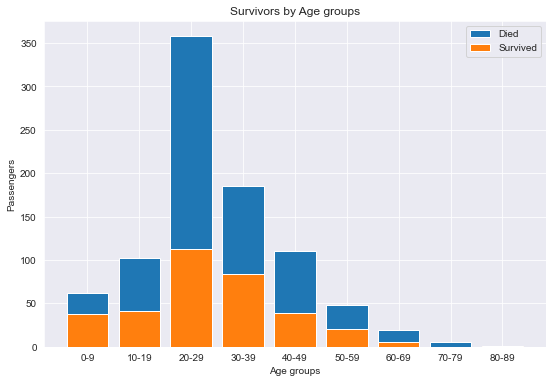

In [42]:
# Plotting the above story

#x = survived_total_by_pclass.index.values
x = range(len(age_group_summary.index.values))
ht = age_group_summary.Total
hs = age_group_summary.Survived

pht = plt.bar(x, ht)
phs = plt.bar(x, hs)

plt.xticks(x,age_group_summary.index.values)
plt.xlabel('Age groups')
plt.ylabel('Passengers')
plt.title('Survivors by Age groups')

plt.legend([pht,phs],['Died', 'Survived'])

In [43]:
age_group_summary['Percent survived'] = (age_group_summary.Survived / age_group_summary.Total) *100

age_group_summary

,Survived,Total,Percent survived
AgeGroup,,,
0-9,38,62,61.290323
10-19,41,102,40.196078
20-29,113,358,31.564246
30-39,84,185,45.405405
40-49,39,110,35.454545
50-59,20,48,41.666667
60-69,6,19,31.578947
70-79,0,6,0.000000
80-89,1,1,100.000000


Most survivors are from 20-29 age group, but the best survival rate was of the kids age group

In [44]:
Gender_agegroup_summary = titanic_df.groupby(['Sex','AgeGroup'], as_index=False)['Survived'].mean()
Gender_agegroup_summary

,Sex,AgeGroup,Survived
0,female,0-9,0.633333
1,female,10-19,0.755556
2,female,20-29,0.681034
3,female,30-39,0.855072
4,female,40-49,0.687500
5,female,50-59,0.888889
6,female,60-69,1.000000
7,male,0-9,0.593750
8,male,10-19,0.122807
9,male,20-29,0.140496


In [45]:
male_agegroup_summary = Gender_agegroup_summary[Gender_agegroup_summary['Sex'] == 'male']
male_agegroup_summary

,Sex,AgeGroup,Survived
7,male,0-9,0.593750
8,male,10-19,0.122807
9,male,20-29,0.140496
10,male,30-39,0.215517
11,male,40-49,0.217949
12,male,50-59,0.133333
13,male,60-69,0.133333
14,male,70-79,0.000000
15,male,80-89,1.000000


In [47]:
female_agegroup_summary = Gender_agegroup_summary[Gender_agegroup_summary['Sex'] == 'female']
female_agegroup_summary

,Sex,AgeGroup,Survived
0,female,0-9,0.633333
1,female,10-19,0.755556
2,female,20-29,0.681034
3,female,30-39,0.855072
4,female,40-49,0.687500
5,female,50-59,0.888889
6,female,60-69,1.000000


In [48]:
age_group = titanic_df.AgeGroup.unique()
age_labels = sorted(age_group)
print (age_labels)

['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']


Text(0.5, 1.0, 'Survivors by Gender and Age groups')

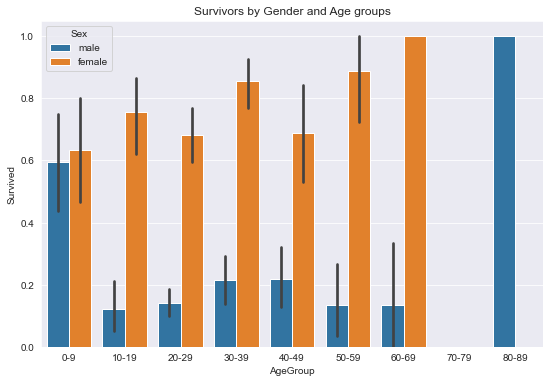

In [52]:
ax = sns.barplot(x = 'AgeGroup', y = 'Survived', data = titanic_df, hue = 'Sex', order = age_labels)
ax.set_title('Survivors by Gender and Age groups')

It is clearly visible that female and children or female with kids were given preference in rescue operation of Titanic
Kids(femake or male) had the highest survival rate

# Limitations of current analysis:
    1) The hypotheses are not statistically tested, but are validated using proportions, percentages and visualizations
Limitations of the current dataset in analysis
    1) Had a lot of missing values
    2) Sample size
    3) May be the dataset is just a sample of entire passengers dataset of Titanic

# Homework:
    1) Analysis of survival rate: Agegroup with Passenger class
    2) Analysis of survival rate: Gender with Passenger class